K-nearest Neighbor classifier

In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
#The dataset is loaded

df=pd.read_csv('korea_subreddit_comments.csv')

In [ ]:
#display the first five rows of the dataset

df.head()

,comment_id,thread_id,parent_id,author,body,distinguished,is_submitter,score,stickied,created_utc,edited
0,ea890251-f4ae-555a-985e-5c5692cfb707,c091715a-9c0b-5145-b0f3-2cf17475ad87,c091715a-9c0b-5145-b0f3-2cf17475ad87,6d8224c6-85a4-5546-93f8-9d6d1644b78d,Evil looking mf,NaN,False,1,False,2024-12-09 23:34:02,1970-01-01 00:00:00
1,9fa939b9-1678-5801-9fdd-1c2d1d3aac7e,f08c477a-b97c-55d8-85ba-7751f6299f54,9e6603c8-42e7-54c1-a226-f6eca6b20de8,8609ec8b-8a27-57e8-932d-4cbe575d8957,End up at Tokyo Disney like Kim Jong-nam,NaN,False,1,False,2024-12-09 23:30:42,1970-01-01 00:00:00
2,f5496c8d-ba50-5465-8239-7867c8fe3acb,3fc405a9-1ba1-5de5-90cb-497d02c74e49,9bea9a0f-6952-5b20-b3a6-c1db25e9b15c,9ef2092c-fd54-546e-8c2a-ba302b3b6fc5,Spot on. The Danish and Swedish embassies in K...,NaN,False,1,False,2024-12-09 23:28:32,1970-01-01 00:00:00
3,e5d6e647-b4e5-54c5-8170-3e809679c1c9,f08c477a-b97c-55d8-85ba-7751f6299f54,f08c477a-b97c-55d8-85ba-7751f6299f54,6f6228f4-f281-5f1b-a1f6-5e6c6dc7cb66,Banned from leaving??? Not sure if that's nece...,NaN,False,1,False,2024-12-09 23:25:35,1970-01-01 00:00:00
4,6c7aff95-20c7-5d3e-afca-de63e991b374,3fc405a9-1ba1-5de5-90cb-497d02c74e49,02bec291-d008-52e4-848b-223615b56527,9ef2092c-fd54-546e-8c2a-ba302b3b6fc5,"Yes, the US embassy in Sweden and Germany look...",NaN,False,1,False,2024-12-09 23:24:34,1970-01-01 00:00:00


In [ ]:
#display a summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23713 entries, 0 to 23712
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   comment_id     23713 non-null  object
 1   thread_id      23713 non-null  object
 2   parent_id      23713 non-null  object
 3   author         23713 non-null  object
 4   body           23713 non-null  object
 5   distinguished  64 non-null     object
 6   is_submitter   23713 non-null  bool  
 7   score          23713 non-null  int64 
 8   stickied       23713 non-null  bool  
 9   created_utc    23713 non-null  object
 10  edited         23713 non-null  object
dtypes: bool(2), int64(1), object(8)
memory usage: 1.7+ MB


In [ ]:
#count the unique values

df['distinguished'].value_counts()

distinguished
moderator    64
Name: count, dtype: int64

In [ ]:
#remove the column from the DataFrame

df = df.drop('distinguished', axis=1)

In [ ]:
#count the unique values

df['is_submitter'].value_counts()

is_submitter
False    22438
True      1275
Name: count, dtype: int64

In [ ]:
#mapping and convert the column to integer

df['is_submitter'] = df['is_submitter'].map({True: 1, False: 0})
df['is_submitter'] = df['is_submitter'].astype(int)


In [10]:
df.head()

,comment_id,thread_id,parent_id,author,body,is_submitter,score,stickied,created_utc,edited
0,ea890251-f4ae-555a-985e-5c5692cfb707,c091715a-9c0b-5145-b0f3-2cf17475ad87,c091715a-9c0b-5145-b0f3-2cf17475ad87,6d8224c6-85a4-5546-93f8-9d6d1644b78d,Evil looking mf,0,1,False,2024-12-09 23:34:02,1970-01-01 00:00:00
1,9fa939b9-1678-5801-9fdd-1c2d1d3aac7e,f08c477a-b97c-55d8-85ba-7751f6299f54,9e6603c8-42e7-54c1-a226-f6eca6b20de8,8609ec8b-8a27-57e8-932d-4cbe575d8957,End up at Tokyo Disney like Kim Jong-nam,0,1,False,2024-12-09 23:30:42,1970-01-01 00:00:00
2,f5496c8d-ba50-5465-8239-7867c8fe3acb,3fc405a9-1ba1-5de5-90cb-497d02c74e49,9bea9a0f-6952-5b20-b3a6-c1db25e9b15c,9ef2092c-fd54-546e-8c2a-ba302b3b6fc5,Spot on. The Danish and Swedish embassies in K...,0,1,False,2024-12-09 23:28:32,1970-01-01 00:00:00
3,e5d6e647-b4e5-54c5-8170-3e809679c1c9,f08c477a-b97c-55d8-85ba-7751f6299f54,f08c477a-b97c-55d8-85ba-7751f6299f54,6f6228f4-f281-5f1b-a1f6-5e6c6dc7cb66,Banned from leaving??? Not sure if that's nece...,0,1,False,2024-12-09 23:25:35,1970-01-01 00:00:00
4,6c7aff95-20c7-5d3e-afca-de63e991b374,3fc405a9-1ba1-5de5-90cb-497d02c74e49,02bec291-d008-52e4-848b-223615b56527,9ef2092c-fd54-546e-8c2a-ba302b3b6fc5,"Yes, the US embassy in Sweden and Germany look...",0,1,False,2024-12-09 23:24:34,1970-01-01 00:00:00


In [ ]:
#count the unique values

df['stickied'].value_counts()

stickied
False    23702
True        11
Name: count, dtype: int64

In [ ]:
#mapping and convert the column to integer

df['stickied'] = df['stickied'].map({True: 1, False: 0})
df['stickied'] = df['stickied'].astype(int)

In [13]:
df.head()

,comment_id,thread_id,parent_id,author,body,is_submitter,score,stickied,created_utc,edited
0,ea890251-f4ae-555a-985e-5c5692cfb707,c091715a-9c0b-5145-b0f3-2cf17475ad87,c091715a-9c0b-5145-b0f3-2cf17475ad87,6d8224c6-85a4-5546-93f8-9d6d1644b78d,Evil looking mf,0,1,0,2024-12-09 23:34:02,1970-01-01 00:00:00
1,9fa939b9-1678-5801-9fdd-1c2d1d3aac7e,f08c477a-b97c-55d8-85ba-7751f6299f54,9e6603c8-42e7-54c1-a226-f6eca6b20de8,8609ec8b-8a27-57e8-932d-4cbe575d8957,End up at Tokyo Disney like Kim Jong-nam,0,1,0,2024-12-09 23:30:42,1970-01-01 00:00:00
2,f5496c8d-ba50-5465-8239-7867c8fe3acb,3fc405a9-1ba1-5de5-90cb-497d02c74e49,9bea9a0f-6952-5b20-b3a6-c1db25e9b15c,9ef2092c-fd54-546e-8c2a-ba302b3b6fc5,Spot on. The Danish and Swedish embassies in K...,0,1,0,2024-12-09 23:28:32,1970-01-01 00:00:00
3,e5d6e647-b4e5-54c5-8170-3e809679c1c9,f08c477a-b97c-55d8-85ba-7751f6299f54,f08c477a-b97c-55d8-85ba-7751f6299f54,6f6228f4-f281-5f1b-a1f6-5e6c6dc7cb66,Banned from leaving??? Not sure if that's nece...,0,1,0,2024-12-09 23:25:35,1970-01-01 00:00:00
4,6c7aff95-20c7-5d3e-afca-de63e991b374,3fc405a9-1ba1-5de5-90cb-497d02c74e49,02bec291-d008-52e4-848b-223615b56527,9ef2092c-fd54-546e-8c2a-ba302b3b6fc5,"Yes, the US embassy in Sweden and Germany look...",0,1,0,2024-12-09 23:24:34,1970-01-01 00:00:00


In [14]:
df['score'].value_counts()

score
 1      6248
 2      2879
 3      1842
 4      1015
 0      1007
        ... 
 253       1
-127       1
-57        1
 165       1
 539       1
Name: count, Length: 409, dtype: int64

In [15]:
categorical_col=df.select_dtypes(include=['object', 'category']).columns

In [16]:
categorical_col

Index(['comment_id', 'thread_id', 'parent_id', 'author', 'body', 'created_utc',
       'edited'],
      dtype='object')

In [17]:
cardinality = df[categorical_col].nunique()

In [18]:
cardinality

comment_id     23713
thread_id        838
parent_id      10581
author          8025
body           22624
created_utc    23455
edited          1058
dtype: int64

In [19]:
low_cardinality = [col for col in cardinality.index if cardinality[col] <= 5]

In [20]:
low_cardinality

[]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23713 entries, 0 to 23712
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_id    23713 non-null  object
 1   thread_id     23713 non-null  object
 2   parent_id     23713 non-null  object
 3   author        23713 non-null  object
 4   body          23713 non-null  object
 5   is_submitter  23713 non-null  int32 
 6   score         23713 non-null  int64 
 7   stickied      23713 non-null  int32 
 8   created_utc   23713 non-null  object
 9   edited        23713 non-null  object
dtypes: int32(2), int64(1), object(7)
memory usage: 1.6+ MB


In [ ]:
#convert the categorical values into numerical labels

categorical_col=df.select_dtypes(include=['object','category']).columns
LabelEncoder=LabelEncoder
for col in categorical_col:
    df[col]=LabelEncoder().fit_transform(df[col])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23713 entries, 0 to 23712
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   comment_id    23713 non-null  int32
 1   thread_id     23713 non-null  int32
 2   parent_id     23713 non-null  int32
 3   author        23713 non-null  int32
 4   body          23713 non-null  int32
 5   is_submitter  23713 non-null  int32
 6   score         23713 non-null  int64
 7   stickied      23713 non-null  int32
 8   created_utc   23713 non-null  int32
 9   edited        23713 non-null  int32
dtypes: int32(9), int64(1)
memory usage: 1019.0 KB


In [ ]:
#convert all columns in the DataFrame to integer type

df=df.astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23713 entries, 0 to 23712
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   comment_id    23713 non-null  int32
 1   thread_id     23713 non-null  int32
 2   parent_id     23713 non-null  int32
 3   author        23713 non-null  int32
 4   body          23713 non-null  int32
 5   is_submitter  23713 non-null  int32
 6   score         23713 non-null  int32
 7   stickied      23713 non-null  int32
 8   created_utc   23713 non-null  int32
 9   edited        23713 non-null  int32
dtypes: int32(10)
memory usage: 926.4 KB


In [44]:
x=df.drop('is_submitter',axis=1)

In [ ]:
y=df['is_submitter']

In [ ]:
#splits the dataset into training and temporary sets

x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
#splits the dataset into training and temporary sets

x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5, random_state=42)

In [ ]:
#scaled the feature datasets

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#Model traning

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred = knn.predict(x_test)

In [52]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.95


In [ ]:
#classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3385
           1       0.20      0.01      0.01       172

    accuracy                           0.95      3557
   macro avg       0.58      0.50      0.49      3557
weighted avg       0.92      0.95      0.93      3557



In [ ]:
#KFold cross-validation with 5 splits

from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True, random_state=42)
scaler_x=StandardScaler()
x_scaled=scaler_x.fit_transform(x)
mse_val=cross_val_score(knn,x_scaled,y,cv=kf)
print(mse_val)


[0.94518237 0.93864643 0.94286317 0.94896668 0.9487558 ]


In [55]:
# k-fold K=10
cv_scores = cross_val_score(knn, x, y, cv=10)  # 10-fold cross-validation

In [56]:
print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean accuracy from cross-validation: {cv_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {cv_scores.std():.2f}')

Cross-validation scores for each fold: [0.94561551 0.94182125 0.94350759 0.94601434 0.94474905 0.94601434
 0.94601434 0.94432729 0.93673555 0.91142978]
Mean accuracy from cross-validation: 0.94
Standard deviation of cross-validation scores: 0.01


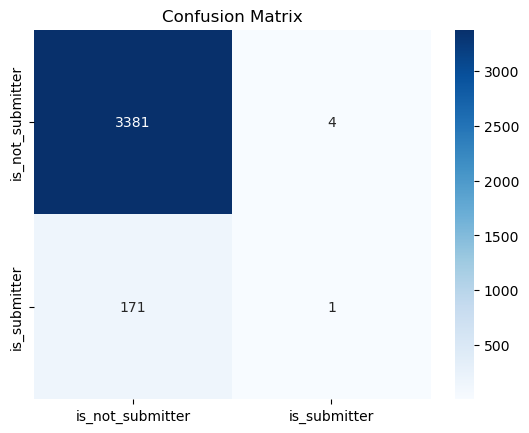

In [57]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['is_not_submitter', 'is_submitter'], yticklabels=['is_not_submitter', 'is_submitter'])
plt.title('Confusion Matrix')
plt.show()

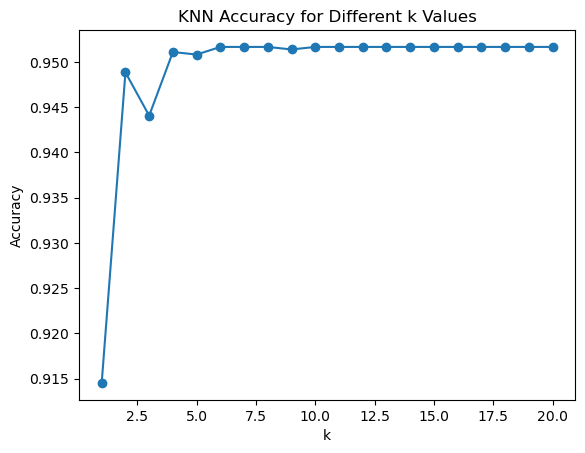

In [60]:
k_values = range(1, 21)
accuracy_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy_list.append(accuracy_score(y_test, knn.predict(x_test)))

plt.plot(k_values, accuracy_list, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()